In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  # SES
from statsmodels.tsa.holtwinters import Holt  # holts exponential  smoothening
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
walmart = pd.read_csv(r"C:\Users\91863\Downloads\footfalls.csv")
walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [6]:
walmart.shape

(159, 17)

<Axes: >

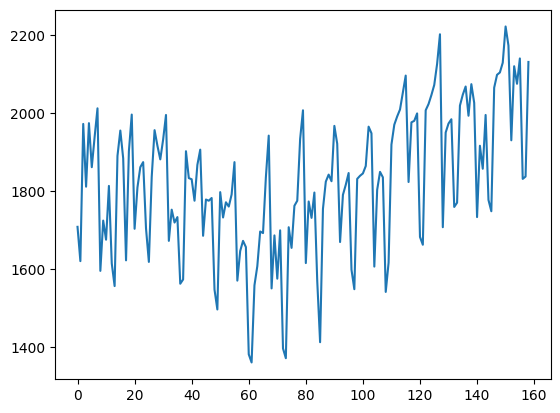

In [7]:
walmart.Footfalls.plot()

In [11]:
import matplotlib.pyplot as plt

non-linear - quadratic trend


# splitting data

In [8]:
train = walmart.head(147)
test = walmart.tail(12)

# moving average

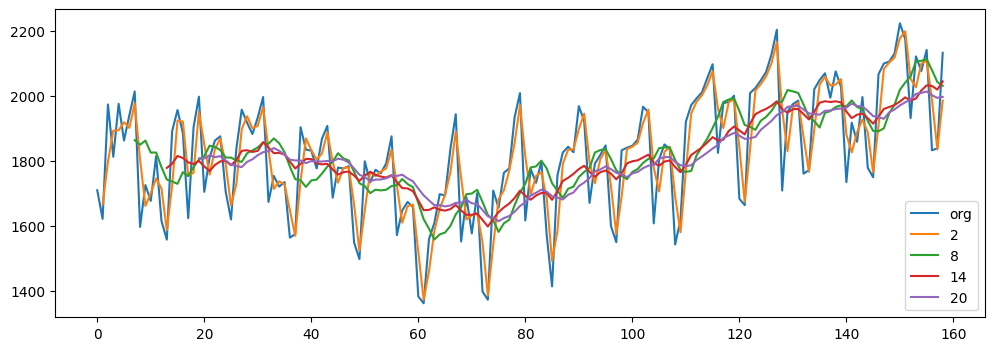

In [12]:
plt.figure(figsize=(12,4))
walmart.Footfalls.plot(label = "org")
for i in range(2,24,6):
    walmart["Footfalls"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = "best")

# time series decomposition plot

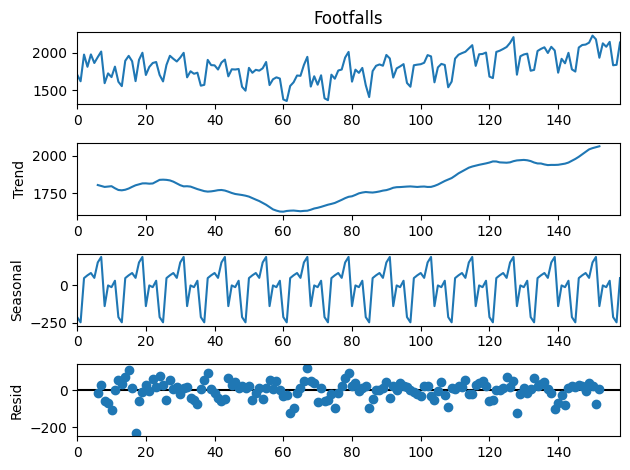

In [20]:
decompose_ts_add = seasonal_decompose(walmart.Footfalls,period=12)
decompose_ts_add.plot()
plt.show()

#  ACF plots and PACF plots

c:\Users\91863\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


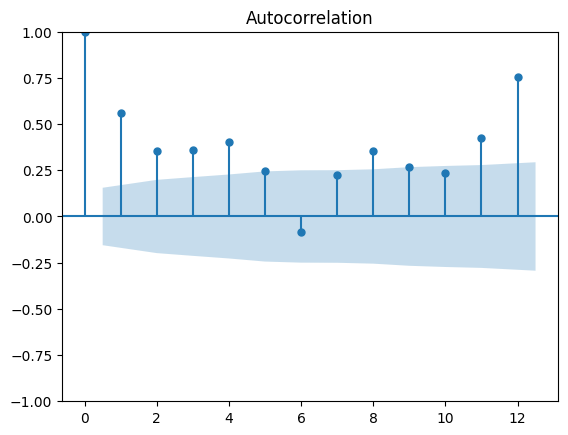

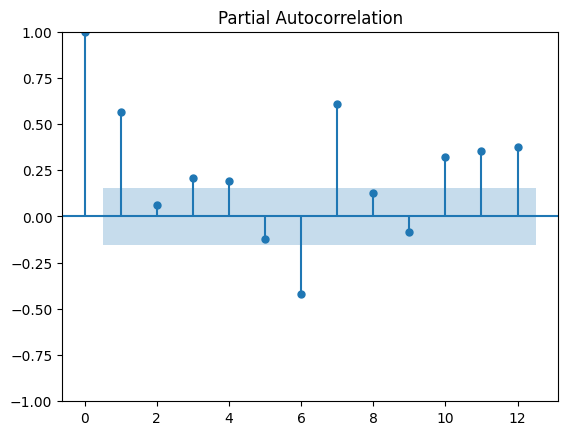

In [21]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(walmart.Footfalls,lags=12)
plt.show()

In [22]:
# p =4, q =1

# evaluation metrics MAPE

In [23]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# simple exponential method

In [42]:
ses_model= SimpleExpSmoothing(train["Footfalls"]).fit(smoothing_level = 0.2)
pred_ses=ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Footfalls)

8.490637057828364

# holt method

In [43]:
hw_model = Holt(train["Footfalls"]).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Footfalls)

C:\Users\91863\AppData\Local\Temp\ipykernel_13208\611593741.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train["Footfalls"]).fit(smoothing_level=0.8,smoothing_slope=0.2)


7.546249229496066

# holts winter exponential smoothing with additive seasonality and additive trend

In [44]:
hwe_model_add_add= ExponentialSmoothing(train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add=hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Footfalls)

2.0083954068872694

# holts winter exponential smoothing with multiplicative seasonality and additive trend

In [45]:
hwe_model_mul_add= ExponentialSmoothing(train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add=hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Footfalls)

2.9678498441563517

# final model by combination train and test

In [46]:
hwe_model_add_add= ExponentialSmoothing(walmart["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit()



In [47]:
# forecasting for next 10 time periods

hwe_model_add_add.forecast(10)

159    2167.603983
160    2196.534548
161    2170.459772
162    2261.723112
163    2288.782154
164    1939.737783
165    2117.829749
166    2089.129584
167    2137.493987
168    1847.599170
dtype: float64